In [2]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import os
from PIL import Image
from pylab import *
import skimage.io as io
from skimage.transform import resize
from scipy import ndimage
import numpy as np
import matplotlib.image as mpimg

In [3]:
IMDIR= "/Users/reda/Downloads/EI2/PROJET/datasim-prj-phantoms-dataset-201812061411/digital/2.16.840.1.113669.632.20.20120425.94758942.2456.10/"
ds = pydicom.dcmread(IMDIR+"/2.16.840.1.113669.632.20.20120425.94850094.200083.40.dcm")


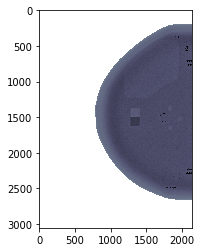

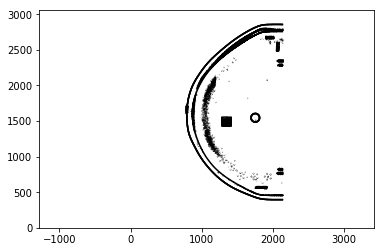

In [7]:
figure(1)
im= ds.pixel_array
io.imsave("/Users/reda/Downloads/reeeda.tiff",im)
plt.imshow(im, cmap=plt.cm.bone)

figure(2)
contour(im, colors='black', origin='image')
axis('equal')
show()

In [5]:
def meanKernel(hs):
    kernel = 1/np.power((2*hs+1),2) * np.ones([2*hs+1,2*hs+1])
    return kernel

def gaussianKernel(hs,sig):
    kernel = np.zeros([2*hs+1,2*hs+1])
    for x in range(hs+1):
        for y in range(hs+1):
            kernel[hs+x][hs+y] = 1/(2* np.pi)/(sig**2) * np.exp(-(x**2+y**2)/(2*sig**2))
            kernel[hs-x][hs-y] = 1/(2* np.pi)/(sig**2) * np.exp(-(x**2+y**2)/(2*sig**2))
            kernel[hs+x][hs-y] = 1/(2* np.pi)/(sig**2) * np.exp(-(x**2+y**2)/(2*sig**2))
            kernel[hs-x][hs+y] = 1/(2* np.pi)/(sig**2) * np.exp(-(x**2+y**2)/(2*sig**2))
    return kernel / np.sum(kernel)


File saved.


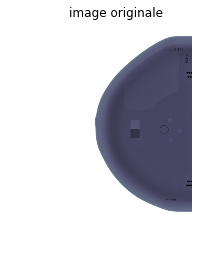

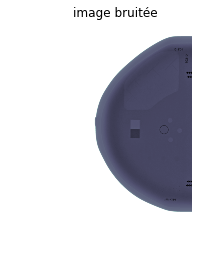

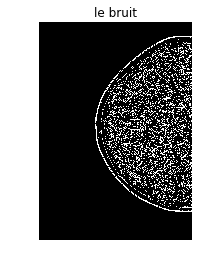

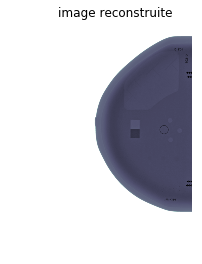

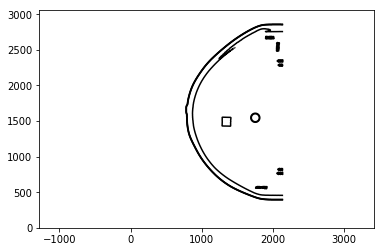

In [8]:
import scipy

im = ndimage.gaussian_filter(im, 3)

figure(4)
plt.imshow(im, cmap = plt.cm.bone)
plt.axis('off')
plt.title('image originale')
#plt.savefig('imageoriginale')



kernel = gaussianKernel(10,1)
blurred_im = ndimage.convolve(im,kernel)
figure(5)

plt.imshow(blurred_im, cmap = plt.cm.bone)
plt.axis('off')
plt.title('image bruitée')


k = 1
im_mask = im - blurred_im
figure(6)
plt.imshow(im_mask, cmap = plt.cm.bone)
plt.axis('off')
plt.title('le bruit')


new_im = im + k * im_mask
figure(7)
plt.imshow(new_im, cmap = plt.cm.bone)
plt.axis('off')
plt.title('image reconstruite')
io.imsave("/Users/reda/Downloads/reeeeeeeeda.tiff",new_im)



#ds.save_as('reeeeda.dcm')
#plt.savefig('imagereconstruite')
print('File saved.')

"""
figure(8)
plt.imshow(im,cmap = plt.cm.bone, interpolation="bicubic")
plt.title('interpolation bicubic')
plt.axis('off')
"""

figure(9)
contour(im, colors='black', origin='image')
axis('equal')
show()

